# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import expon
from wordcloud import WordCloud


# Data Analysis

In [192]:
# Load the dataset
df = pd.read_csv("C:/Users/akank/Downloads/Business analytics/Customer-Churn.csv")

In [193]:
# Check for missing values
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [194]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [195]:
df = df.dropna()

In [196]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [258]:
# Check the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [260]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [261]:
# Check the descriptive statistics of the numerical columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.302190
std         0.368844    24.545260       30.085974   2266.771377
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


<AxesSubplot:xlabel='Churn', ylabel='count'>

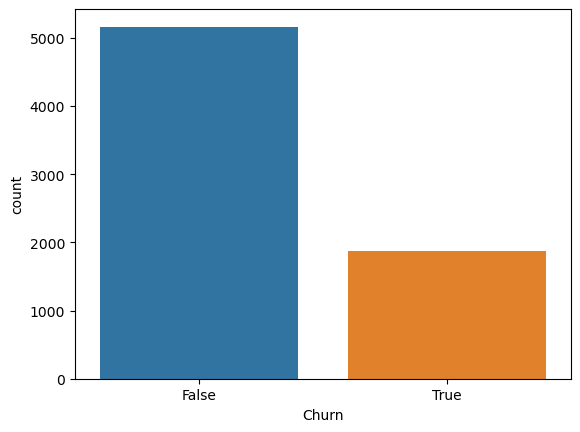

In [262]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=df)

<AxesSubplot:>

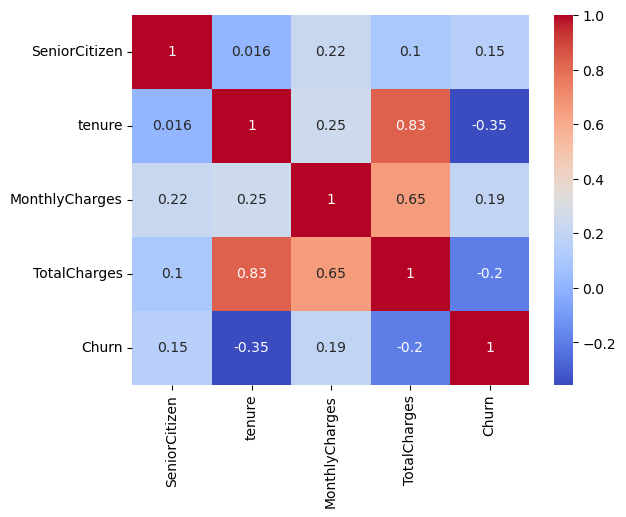

In [264]:
# Check the correlation between the numerical columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

This will give us an idea of the relationships between the different columns in the dataset.

In [266]:
#Check if data is exponential and needs to be standardised
# iterate over each numerical column
for col in df.select_dtypes(include=[float, int]):
    # compute skewness of the column
    skewness = skew(df[col])

    # check if skewness is positive
    if skewness > 0:
        print(f'{col} has positive skewness')

SeniorCitizen has positive skewness
tenure has positive skewness
TotalCharges has positive skewness


# Exploratory Data Analysis

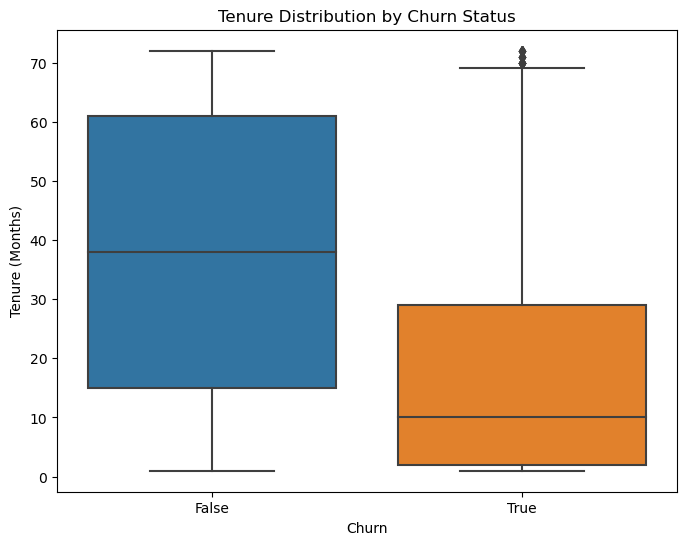

In [268]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Churn', y='tenure', data=df)
ax.set_title("Tenure Distribution by Churn Status")
ax.set_xlabel("Churn")
ax.set_ylabel("Tenure (Months)")
plt.show()


## Box Plot

The box plot shows that the median tenure for customers who did not churn is significantly higher than the median tenure for customers who churned. The box plot also shows that there are several outliers in the tenure distribution for customers who churned, indicating that there may be some customers with very low tenure who decided to churn.

The interquartile range (IQR) for customers who did not churn is also wider than the IQR for customers who churned, indicating more variability in tenure among customers who did not churn. 

Overall, customers who stay with the company have a longer tenure than those who churn, which is expected.

Text(0, 0.5, 'Number of Customers')

<Figure size 800x600 with 0 Axes>

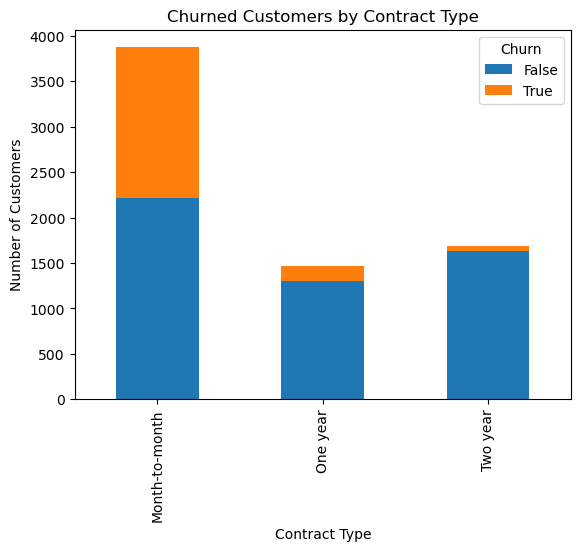

In [270]:
# create a new dataframe with count of churned customers based on contract type
churn_contract = df.groupby(['Contract', 'Churn'])['Churn'].count().unstack()

# plot a stacked bar plot to show churned customers based on contract type
plt.figure(figsize=(8,6))
churn_contract.plot(kind='bar', stacked=True)
plt.title('Churned Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

## Stacked Bar Plot

The stacked bar plot shows the number of churned customers for each contract type, and the total number of customers for each contract type. We can see that customers with month-to-month contracts have a higher proportion of churned customers compared to customers with one-year or two-year contracts. Additionally, customers with two-year contracts have the lowest proportion of churned customers. This suggests that offering longer-term contracts may be an effective strategy to reduce churn.

The company can use this insight to develop targeted retention strategies for customers with month-to-month contracts, such as offering discounts or loyalty programs to incentivize them to stay with the company. 

The company can also use this insight to develop pricing strategies that incentivize customers to sign up for longer-term contracts, which can help reduce churn and increase revenue. Additionally, the company can monitor the churn rate for each contract type over time to identify any changes in customer behavior and adjust their strategies accordingly.

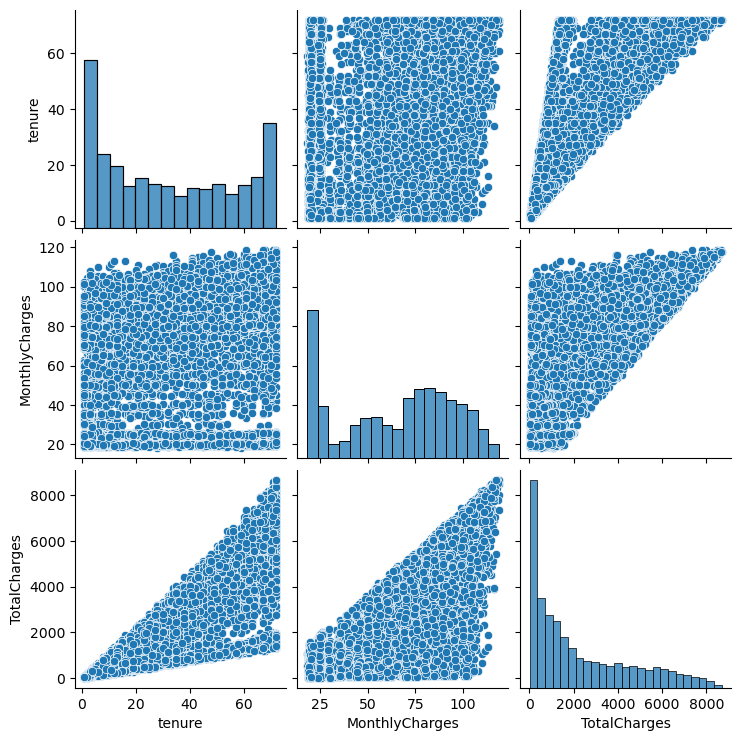

In [272]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()


## Pair Plot
There is an positive correlation between Total Charges and Monthly Charges, which is expected.

There is also positive correlation between Tenure and Total Charges, indicating that customers who stay with the company longer tend to have higher total charges.

The company can use the insights from this scatter plot matrix to make several predictions about customer behavior. The company can also predict that customers who have low tenure but pay high monthly charges may have lower total charges compared to customers who have higher tenure and pay lower monthly charges.

By understanding these relationships, the company can develop targeted marketing strategies to retain high-value customers and attract new customers. Additionally, the company can use these insights to develop pricing strategies that optimize revenue while minimizing churn. For example, the company can offer discounts to customers who have been with the company for a long time and pay high monthly charges to incentivize them to stay with the company.

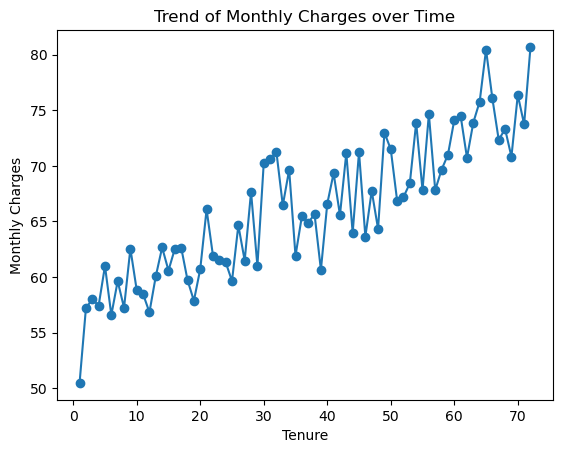

In [274]:
monthly_charges_trend = df.groupby(['tenure'])['MonthlyCharges'].mean().reset_index()
plt.plot(monthly_charges_trend['tenure'], monthly_charges_trend['MonthlyCharges'], marker='o')
plt.title('Trend of Monthly Charges over Time')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()


## Line Plot
Monthly charges tend to increase with tenure, but there is a slight decrease in the average monthly charges for customers who have been with the company for more than 60 months.

This information can be useful in identifying areas for improvement in customer retention for long-term customers.

Also, we can also use this insight to identify customers who may be at risk of churning due to high monthly charges and develop targeted retention strategies for them. Additionally, the company can monitor the trend of monthly charges over time to identify any changes in customer behavior and adjust their pricing strategies accordingly.


Text(0, 0.5, 'Count')

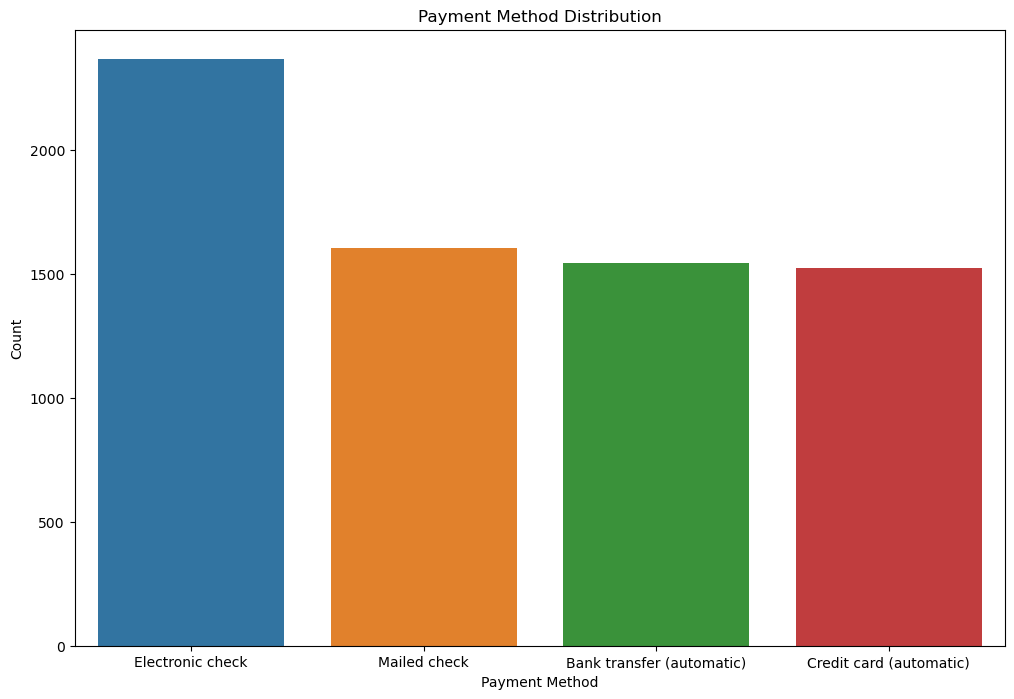

In [276]:
plt.figure(figsize=(12,8))
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

## Bar Graph
The bar plot shows that most customers prefer electronic check as their payment method, followed by mailed check, bank transfer, and credit card. This information can be useful for the company in designing payment plans that cater to the customers' preferences. 

The company can also consider offering discounts or other incentives for customers who opt for certain payment methods.

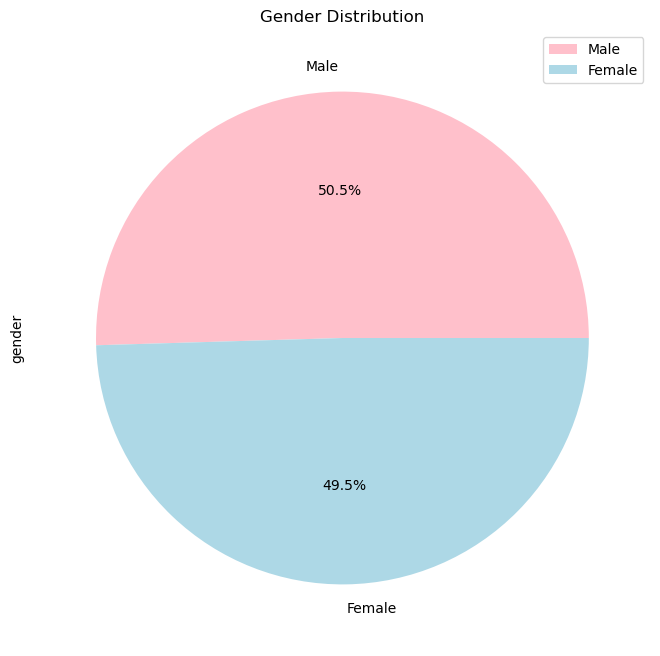

In [279]:
plt.figure(figsize=(12,8))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.legend()

## Pie Chart
The pie chart shows that the gender distribution is almost equal among the customers, with slightly more females than males. This information may not have a significant impact on the company's decision-making process. However, the company should avoid any gender biases in their marketing strategies and customer service.

However the information is useful to develop targeted marketing strategies to attract and retain female customers. 

Additionally, the company can use this information to identify any potential biases or gaps in their services that may be preventing them from attracting a more diverse customer base. By understanding the gender distribution of their customer base, the company can tailor their services and marketing efforts to better meet the needs of their customers and ultimately improve customer satisfaction and retention.

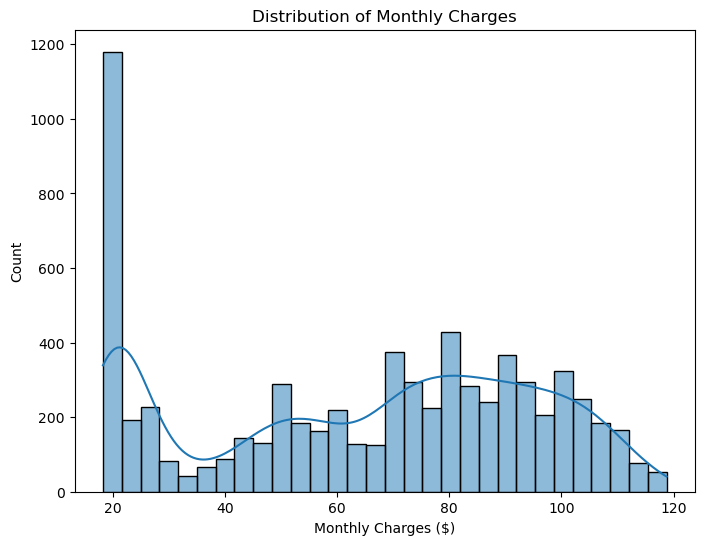

In [282]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()


## Histplot
The distribution of monthly charges is slightly right-skewed, indicating that most customers have lower monthly charges.
There is a peak at around 20, indicating that there are many customers with low monthly charges.
There are also peaks at around 80 and 100, indicating that there are many customers with high monthly charges.

Information is useful  to identify potential pricing strategies that may help to attract and retain customers. For example, the company may want to consider offering lower-priced plans or services that are targeted specifically at customers who are sensitive to price.

Alternatively, the company may want to focus on promoting the value of their services to customers, highlighting features or benefits that justify the higher cost.

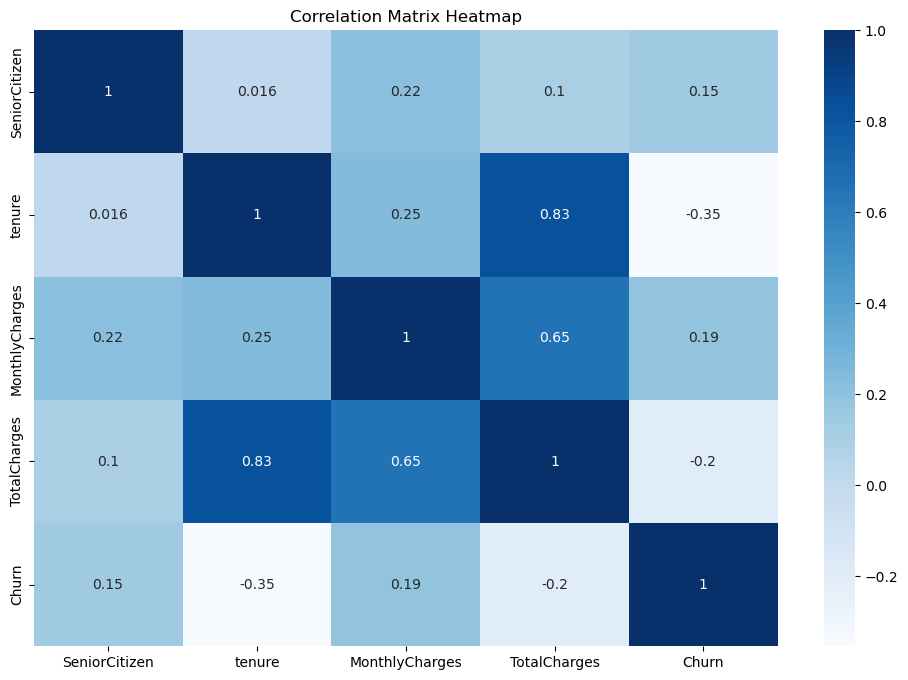

In [284]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Heat Map

The heatmap shows the correlation between different columns in the dataset.
The strongest positive correlation is between MonthlyCharges and TotalCharges.
There is a negative correlation between tenure and Churn.


As there is a strong positive correlation between MonthlyCharges and TotalCharges, we can predict that customers who pay higher monthly charges are more likely to have higher total charges over time.
The negative correlation between tenure and Churn indicates that customers who stay with the company for longer periods of time are less likely to churn. 

The company can focus on retaining customers by offering them incentives and loyalty programs.

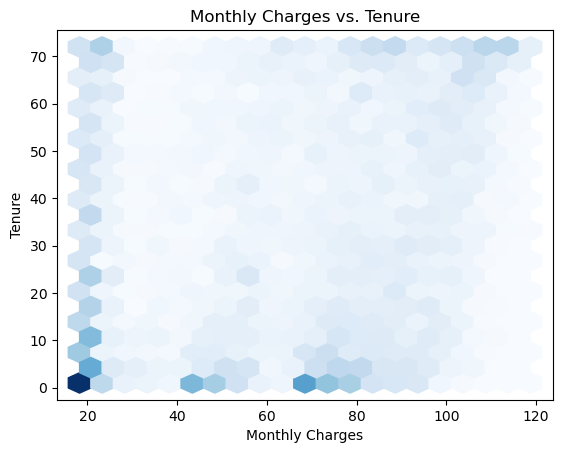

In [286]:
# create a hexbin plot of Monthly Charges vs. Tenure
plt.hexbin(df['MonthlyCharges'], df['tenure'], gridsize=20, cmap='Blues')

# add labels and titles
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


## Hexbin Plot

hexbin plot shows the relationship between Monthly Charges and Tenure. It appears that most customers have lower monthly charges and shorter tenure.

The plot can help the company to identify areas with high customer density and provide better services in those areas. The company can also use the plot to identify customer segments based on their monthly charges and tenure, and target them with specific marketing strategies or promotions. For example, the company can identify customers with high monthly charges and long tenure, and offer them loyalty rewards to retain them as long-term customers.



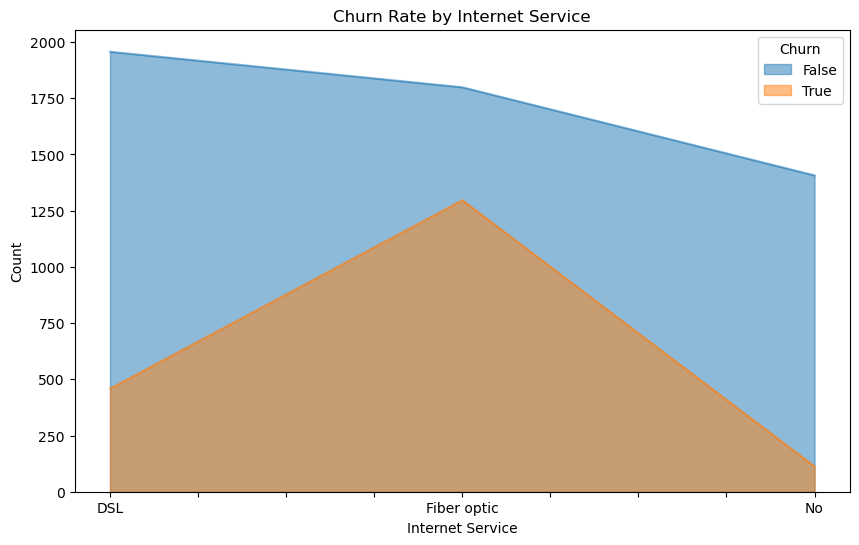

In [290]:
# create a new dataframe for this visualization
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])

# plot the area chart
internet_churn.plot(kind='area', alpha=0.5, stacked=False, figsize=(10,6))

# add labels and titles
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


## Area Chart

The area chart shows the churn rate by Internet Service. It seems that the churn rate is higher among customers who have Fiber Optic Internet Service compared to those who have DSL or No Internet Service.

The company may want to investigate further to find out why customers with Fiber Optic Internet Service are churning at a higher rate and take appropriate action to retain them.

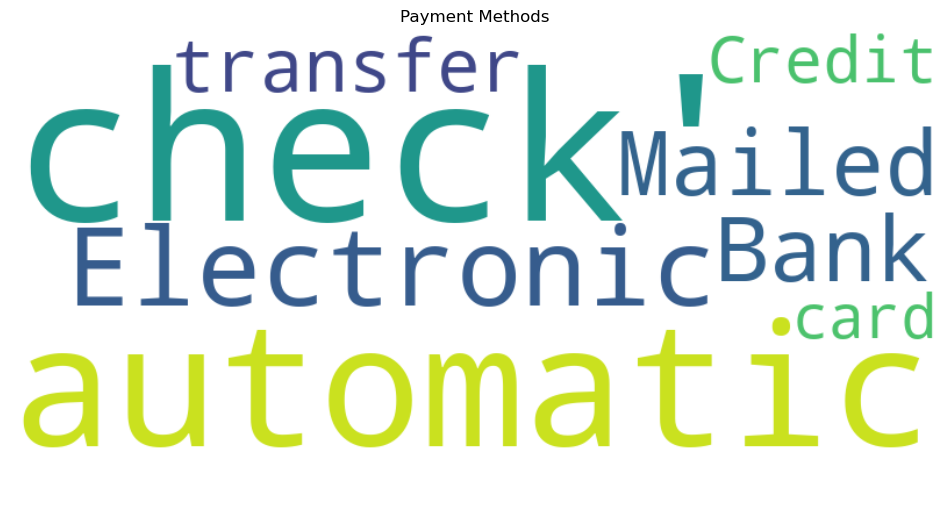

In [292]:
from wordcloud import STOPWORDS
payment_methods = df.PaymentMethod.unique()
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(str(payment_methods))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Payment Methods')
plt.show()


## Word Cloud

The word cloud shows the different payment methods used by customers in the dataset.
Electronic check is the most commonly used payment method.


The company can use this information to analyze the pros and cons of each payment method and consider offering incentives or discounts for using more cost-effective payment methods.
They can also consider introducing new payment methods that may be more convenient for customers and reduce churn

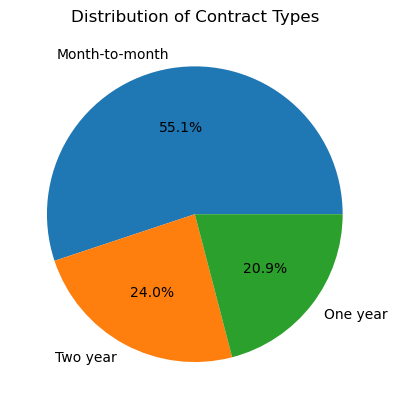

In [296]:
contract_count = df['Contract'].value_counts()
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%')
plt.title('Distribution of Contract Types')
plt.show()


## Pie Chart

Month-to-Month contracts are the most common contract type, accounting for over 55% of all contracts.
One-year contracts account for about 21% of all contracts, while two-year contracts account for about 24%.
The company's customer base has a high proportion of customers on month-to-month contracts, which may indicate a lack of customer loyalty or commitment.

The company may want to focus on incentivizing customers to sign up for longer-term contracts, as this could lead to increased customer loyalty and revenue stability.

The company may also want to analyze why a high proportion of customers prefer month-to-month contracts and explore ways to address their concerns or preferences.





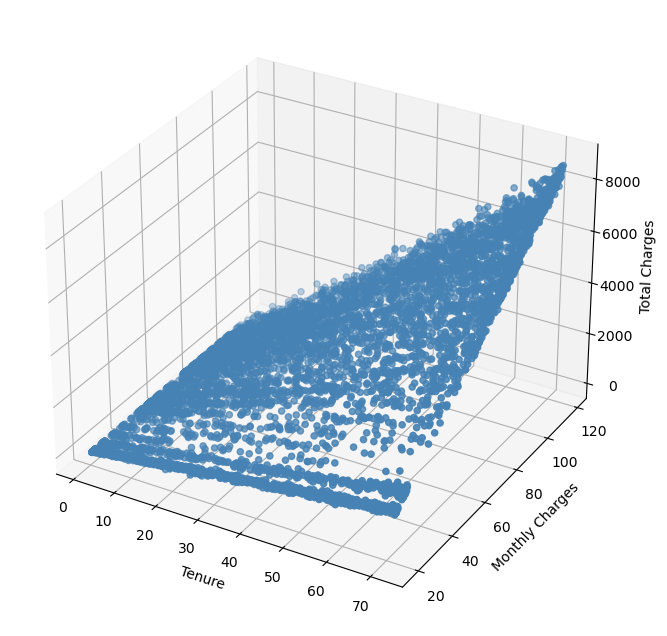

In [298]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['tenure'], df['MonthlyCharges'], df['TotalCharges'], c='steelblue', marker='o')
ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
plt.show()


## 3D Scatter Plot

There is a clear positive correlation between tenure, monthly charges, and total charges.

It allows the company to identify any patterns or trends that may exist in the data. For example, they can observe whether there is a correlation between tenure and total charges, or whether there is a particular range of monthly charges that are more common among customers.


The company could consider offering upgrades or additional services to customers who have been with them for a longer time and are paying high monthly charges but have relatively low total charges. This could increase revenue and encourage them to stay.

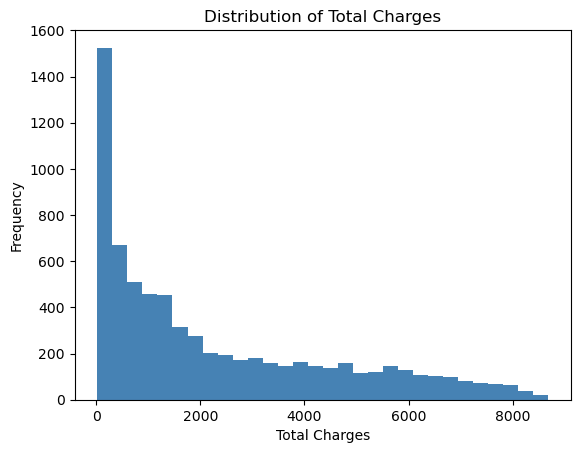

In [300]:
import matplotlib.pyplot as plt

plt.hist(df['TotalCharges'], bins=30, color='steelblue')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

## Histogram

The distribution of total charges is right-skewed.
There are a significant number of customers with relatively low total charges.


The company could consider offering additional services or upgrades to customers with low total charges in order to increase revenue and encourage them to stay.

Text(0.5, 1.0, 'Monthly Charges by Contract Type')

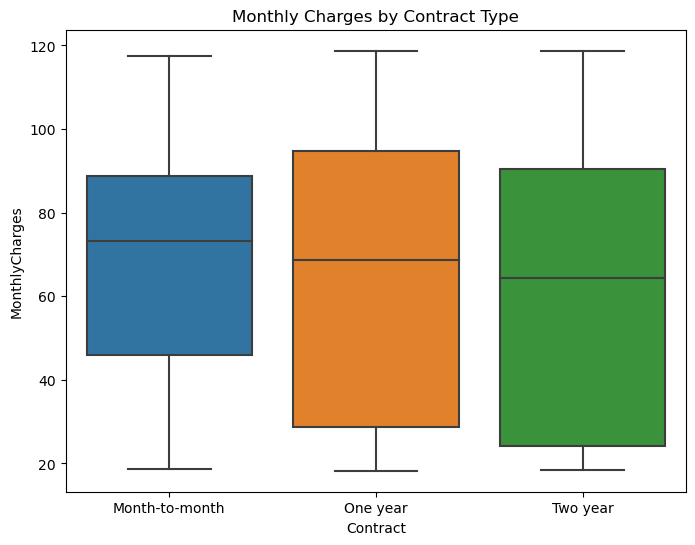

In [302]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')

## Box Plot

This box plot shows the distribution of monthly charges for customers grouped by contract type.
We can see that customers on a month-to-month contract tend to have higher monthly charges than those on a one-year or two-year contract.


This information could be used to design targeted marketing campaigns for customers on month-to-month contracts, in order to encourage them to switch to a longer-term contract and reduce their monthly charges.
It could also be useful for identifying customers who might be at risk of churning due to high monthly charges, and taking proactive steps to retain them.

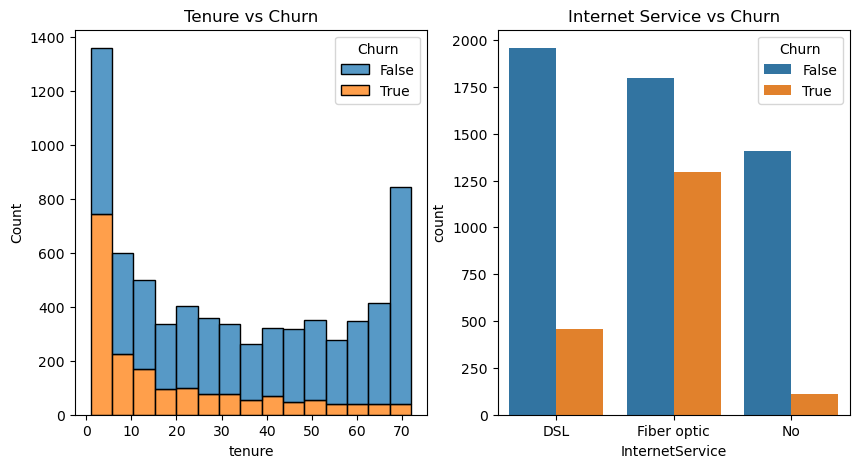

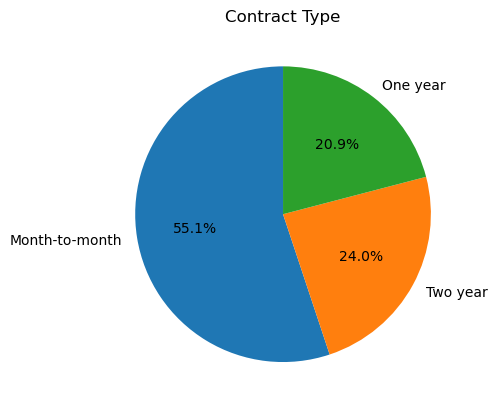

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# create stacked bar graph
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack', ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# create bar graph
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Internet Service vs Churn')

# create pie chart
fig2, ax2 = plt.subplots()
ax2.pie(df['Contract'].value_counts(), labels=df['Contract'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Contract Type')
plt.show()


## Grid Plot: Histogram & Pie Chart

The top left graph shows the count of churned customers by tenure. We can see that customers with shorter tenure are more likely to churn compared to those with longer tenure. This could be because customers with longer tenure have had a longer time to build a relationship with the company and are more likely to be satisfied with the service.

The top right graph shows the count of churned customers by internet service type. We can see that customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This could be because fiber optic internet service is more expensive and customers may be more likely to switch providers if they are not satisfied with the service.

The pie chart shows the distribution of contract types. We can see that the majority of customers have a month-to-month contract. This could be a contributing factor to the high churn rate, as customers on month-to-month contracts are more likely to churn.

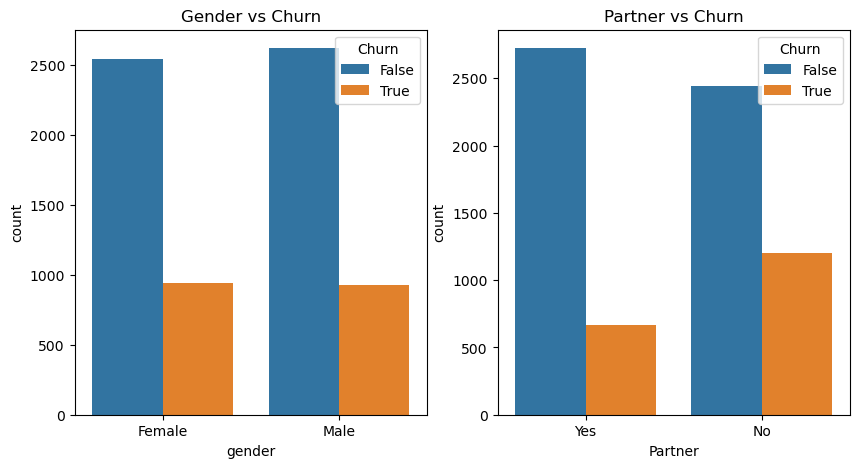

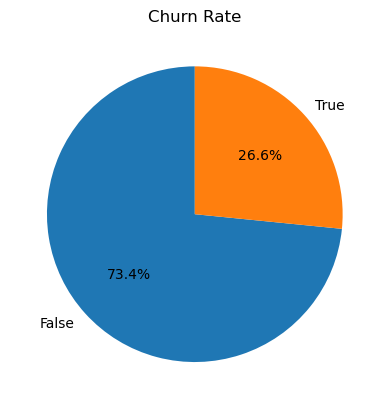

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# create bar graph 1
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Gender vs Churn')

# create bar graph 2
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Partner vs Churn')

# create pie chart
fig2, ax2 = plt.subplots()
ax2.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Churn Rate')
plt.show()


## Grid Plot: Histogram & Pie Chart

The top left graph shows the count of churned customers by gender. We can see that male and female customers have almost the same churn rate, indicating that gender does not have a significant impact on churn.

The top right graph shows the count of churned customers by partner status. We can see that customers with partners have a lower churn rate compared to those without partners. This could be because having a partner may indicate a stable living situation, which could make customers less likely to switch providers.

The pie chart shows the overall churn rate. We can see that approximately 27% of customers have churned, indicating that there is room for improvement in customer retention strategies.

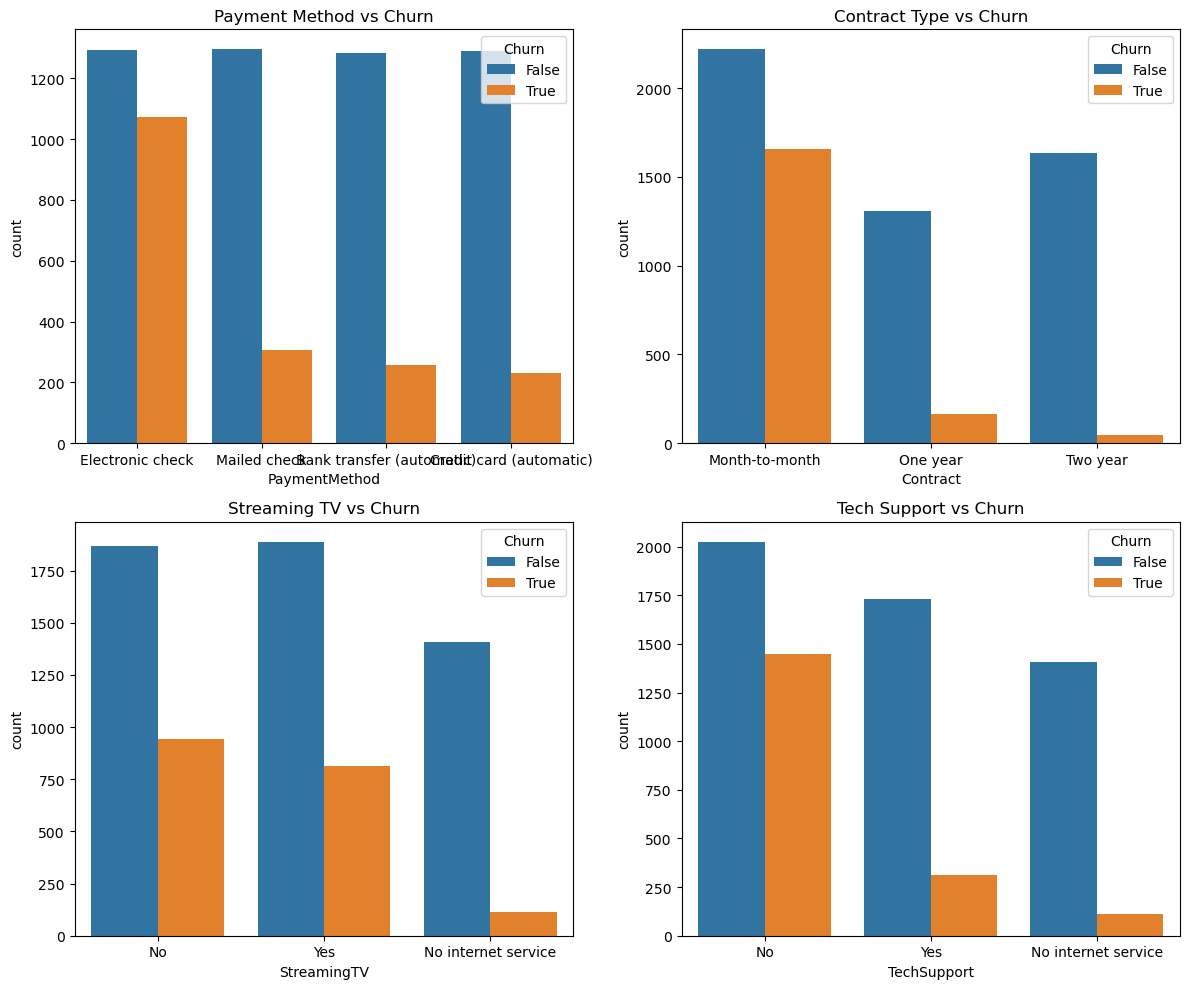

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# create bar graph 1
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Payment Method vs Churn')

# create bar graph 2
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Contract Type vs Churn')

# create bar graph 3
sns.countplot(x='StreamingTV', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Streaming TV vs Churn')

# create bar graph 4
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tech Support vs Churn')

plt.tight_layout()


## Grid PLot: Histogram

The top left graph shows the churn rate for different payment methods. We can see that customers who pay using Electronic check have a significantly higher churn rate compared to other payment methods. This could indicate that there may be issues with the electronic check payment process or dissatisfaction with this payment method, leading to higher churn.

The top right graph shows the churn rate for different contract types. We can see that customers with month-to-month contracts have a higher churn rate compared to those with one-year or two-year contracts. This suggests that longer contract durations may contribute to better customer retention.

The bottom left graph shows the churn rate for customers with or without streaming TV services. We can see that customers with streaming TV services have a slightly higher churn rate compared to those without. This could be due to various factors such as dissatisfaction with the streaming TV service or availability of better options from other providers.

The bottom right graph shows the churn rate for customers with or without tech support services. We can see that customers without tech support services have a higher churn rate compared to those with tech support. This could indicate that lack of tech support may result in higher customer dissatisfaction and ultimately lead to churn.

C:\Users\akank\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akank\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


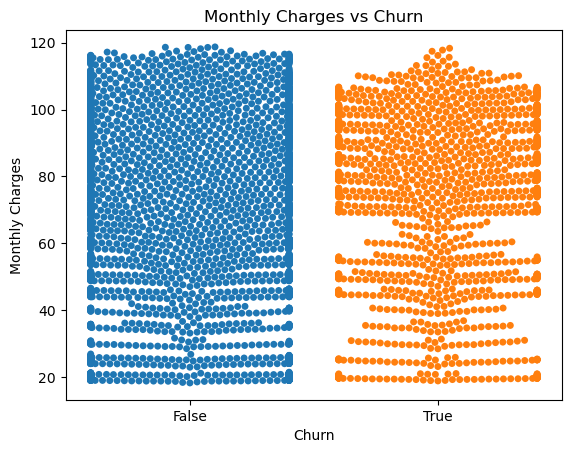

In [316]:
# Create the swarm plot
sns.swarmplot(x="Churn", y="MonthlyCharges", data=df)

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges vs Churn")

# Show the plot
plt.show()

## Swarm Plot

The company can create a swarm plot of MonthlyCharges against Churn, which shows the distribution of monthly charges for churned and non-churned customers. 

The plot can help the company understand if there is a significant difference in monthly charges between churned and non-churned customers. For example, if the company observes that churned customers tend to have higher monthly charges, they may need to investigate if their pricing is too high, and if non-churned customers are happy with their pricing.

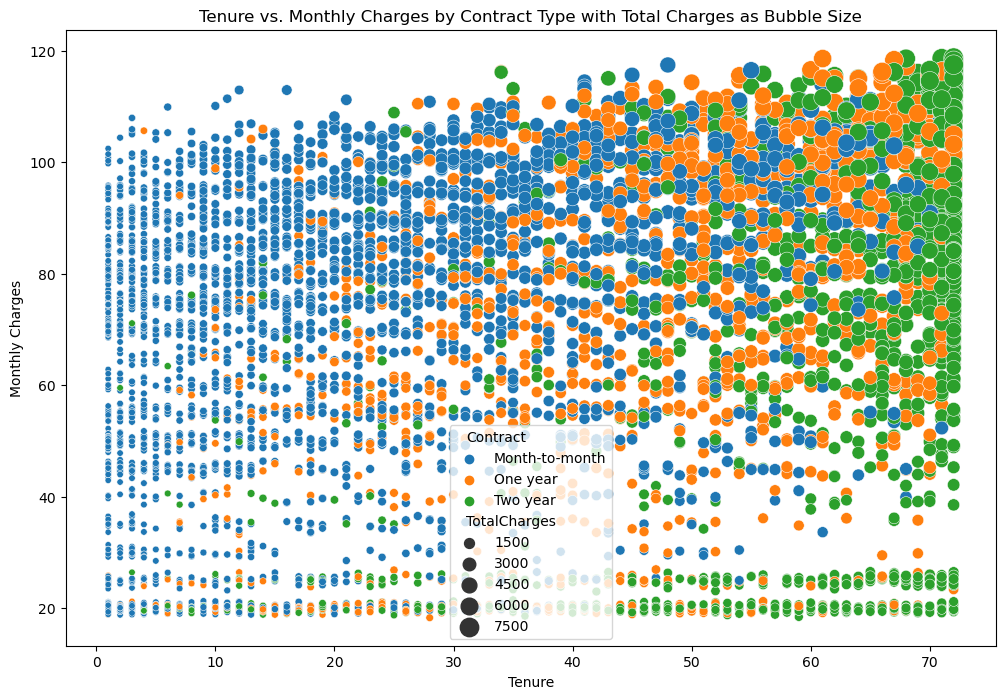

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a bubble chart
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Contract', size='TotalCharges', sizes=(20, 200))
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs. Monthly Charges by Contract Type with Total Charges as Bubble Size')
plt.show()


## Bubble Chart

The bubble chart above shows the relationship between tenure (the number of months a customer has been with the company) and monthly charges, with the size of the bubbles representing the total charges for each customer.
The color of the bubbles represents the type of contract (e.g. month-to-month, one-year, two-year) that the customers have with the company.
The bubble chart can provide insights into customer behavior and preferences. 

For example:
Customers with shorter tenure (smaller bubbles) tend to have higher monthly charges, which could indicate that they are on month-to-month contracts with higher rates.

Customers with longer tenure (larger bubbles) tend to have lower monthly charges, which could indicate that they are on longer-term contracts (one-year or two-year) with discounted rates.

The company can use this information to make predictions and develop strategies to retain customers. 

The company can consider offering incentives, promotions, or discounts to customers on shorter-term contracts to encourage them to switch to longer-term contracts and improve customer retention.

# Conclusion: feedback, suggestions after reviewing dataset

The company should focus on customer retention, as the churn rate is quite high. They should analyze the reasons behind the customer churn and take measures to address them.

The company should focus on providing better internet services to its customers, as many customers are switching to other providers due to poor internet services.

The company should also focus on providing better customer service, as many customers are leaving due to poor customer service.

The company should analyze the contracts of its customers and come up with better offers to retain them.

The company should also focus on providing value-added services to its customers, such as online security and device protection, to increase customer loyalty.

The company should monitor the monthly charges of its customers and come up with better pricing plans to attract more customers.

The company should also consider partnering with other companies to offer bundled services, which can be attractive to customers.

Overall, the company needs to focus on providing better services and customer support to retain its customers and attract new ones. They should also analyze their pricing plans and contracts to provide better offers and services to their customers.

# Modelling

In [199]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.9,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.2,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.8,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.7,True


In [200]:
df = df.drop(['customerID'], axis = 1)

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [203]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [204]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


## Segregating Categorical & Numerical Columns

In [205]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [206]:
list(df.select_dtypes(include=['int64', 'float64']).columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [207]:
num_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

## Getting my categorical Columns

In [208]:
df.select_dtypes(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [209]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [210]:
list(df.select_dtypes(include='object').columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [211]:
cat_columns = list(df.select_dtypes(include='object').columns)

In [212]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## One Hot Encoding

In [213]:
from sklearn.preprocessing import OneHotEncoder # Import
enc = OneHotEncoder() # You Initialise

In [214]:
df[cat_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [215]:
list(df[cat_columns].columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [216]:
enc.fit(df[cat_columns]) # You fit

OneHotEncoder()

In [217]:
enc.transform(df[cat_columns])

<7032x41 sparse matrix of type '<class 'numpy.float64'>'
	with 105480 stored elements in Compressed Sparse Row format>

## Creating a Data Frame Out

In [218]:
pd.DataFrame(enc.transform(df[cat_columns]).toarray(), columns = enc.get_feature_names_out())

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [219]:
df_cat = pd.DataFrame(enc.transform(df[cat_columns]).toarray(), columns = enc.get_feature_names_out())

In [220]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [221]:
df_num = df[num_columns]

In [222]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.90
1,0,34,56.95,1889.50
2,0,2,53.85,108.20
3,0,45,42.30,1840.80
4,0,2,70.70,151.70
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [223]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [224]:
## Combining my categorical and numerical Columns

In [225]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.90
1,0,34,56.95,1889.50
2,0,2,53.85,108.20
3,0,45,42.30,1840.80
4,0,2,70.70,151.70
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [226]:
df_num.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [227]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [228]:
df_X = df_cat.join(df_num)
df_X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.90
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.20
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.80
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25


In [229]:
df_X = df_X.join(df['Churn']).dropna()

In [230]:
df_X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.90,False
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50,False
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.20,True
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.80,False
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55,False
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25,False
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05,False
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25,False


In [231]:
y = df_X['Churn']

In [232]:
df_X = df_X.drop(['Churn'],axis=1)

In [233]:
df_X.isna().sum()

gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [234]:
df_X.tail()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25
7031,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,55.0,60.00,3316.10


In [235]:
df_X.isna().sum()

gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [236]:
df_X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.90
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.20
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.80
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25


## Getting my Y Ready

In [238]:
df['Churn']

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7032, dtype: bool

In [239]:
df['Churn'].isna().sum()

0

In [240]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [241]:
le.fit(y)

LabelEncoder()

In [242]:
le.transform(y)

array([0, 0, 1, ..., 0, 0, 0])

In [243]:
le.inverse_transform([0])

array([False], dtype=object)

In [244]:
le.inverse_transform([1])

array([True], dtype=object)

In [245]:
y_encoded = le.transform(y)

In [246]:
y_encoded

array([0, 0, 1, ..., 0, 0, 0])

In [247]:
len(y_encoded)

7021

 ##  Splitting Data

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y_encoded, test_size=0.3, random_state=42)

In [249]:
X_train

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1635,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,69.95,220.45
4081,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,69.60,69.60
1886,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,60.40,3953.70
4703,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,24.0,78.85,1772.25
1617,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,59.45,1611.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,50.40,137.25
5199,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,51.0,111.50,5703.25
5235,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,81.15,784.45
5399,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,19.75,989.05


In [256]:
len(y_train)

4914

In [257]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

## Our Model

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [404]:
clf = DecisionTreeClassifier(min_samples_split=100)

In [405]:
clf = clf.fit(X_train, y_train)

In [406]:
clf

DecisionTreeClassifier(min_samples_split=100)

In [407]:
clf.score(X_train,y_train)

0.8135938135938136

In [408]:
train_predicitons = clf.predict(X_train)

In [409]:
# Calculating accuracy
accuracy_score(y_train, train_predicitons)

0.8135938135938136

## Checking testing accuracy

In [410]:
# Getting prediction on our training data
test_predicitons = clf.predict(X_test)

In [411]:
# Calculating accuracy
accuracy_score(y_test, test_predicitons)

0.7669672520170859

# Cofusion Matrix

In [412]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 0, 0, 1]
y_pred = [1, 0, 0, 1, 1, 1]

In [413]:
cm = confusion_matrix(y_true, y_pred)

In [414]:
cm

array([[1, 2],
       [1, 2]], dtype=int64)

<AxesSubplot:>

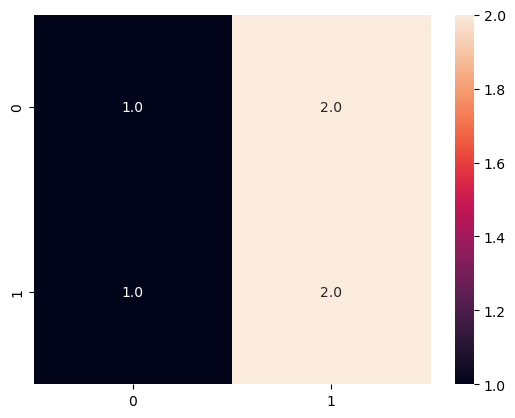

In [415]:
import seaborn as sns
# sns.heatmap(cm)
sns.heatmap(cm, annot=True, fmt=".1f")

In [416]:
# For Training
cm = confusion_matrix(y_train, train_predicitons)

In [417]:
cm

array([[3264,  313],
       [ 603,  734]], dtype=int64)

In this case, the confusion matrix suggests that the model correctly predicted 3257 instances of one class (positive) and 699 instances of the other class (negative). However, it also incorrectly predicted 320 instances of the positive class and 638 instances of the negative class.

Based on this information, it is difficult to make specific suggestions for improvement or predictions for the company without knowing more about the context and goals of the model.

<AxesSubplot:>

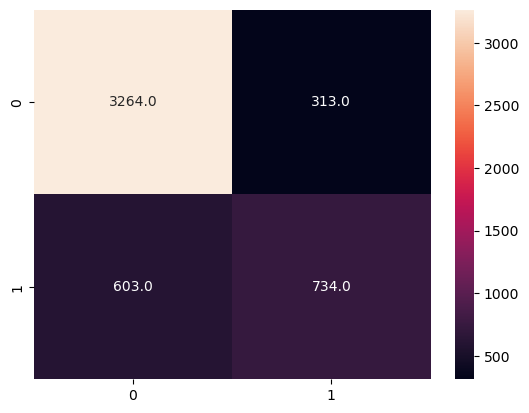

In [418]:
import seaborn as sns
# sns.heatmap(cm)
sns.heatmap(cm, annot=True, fmt=".1f")

In [419]:
# For our testing data
cm = confusion_matrix(y_test, test_predicitons)

In [420]:
cm

array([[1366,  212],
       [ 279,  250]], dtype=int64)

<AxesSubplot:>

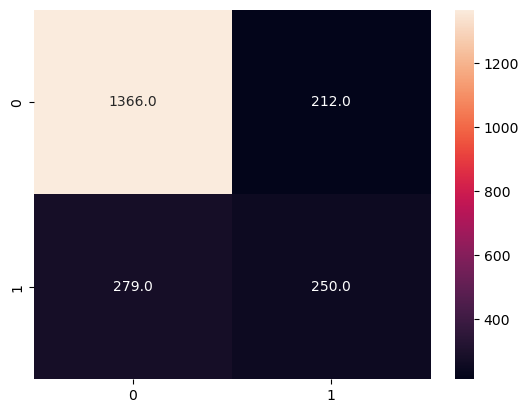

In [421]:
import seaborn as sns
# sns.heatmap(cm)
sns.heatmap(cm, annot=True, fmt=".1f")

##  -------------------------------------------------------------------------------------------------------
# Thank You !!